In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv(r"C:\Users\Haridy\Desktop\manfacturing_data.csv")

In [35]:
data.head()

,Date,Product,Batch,Start Time,End Time,Duration (m),Duration(h),shift,operator name,Emergency stop,...,Batch coding error,Conveyor belt jam,Calibration error,Label switch,Other,operator error,total(m),total(h),non operator error,Month
0,2024-01-01,Diet Cola,420000,10:00 AM,11:08 AM,68,1.1,morning,Dennis,2,...,4,6,2,2,0,0.28,30,0.50,0.22,2024-01
1,2024-01-01,Root Berry,420001,11:00 PM,12:07 AM,67,1.1,night,Mac,1,...,0,1,5,1,0,0.27,30,0.50,0.23,2024-01
2,2024-01-01,Orange,420002,12:00 PM,1:09 PM,69,1.2,morning,Charlie,3,...,3,4,3,2,0,0.22,29,0.49,0.27,2024-01
3,2024-01-01,Cola,420003,3:00 PM,4:03 PM,63,1.1,evening,David,4,...,3,2,2,2,1,0.27,32,0.54,0.27,2024-01
4,2024-01-01,Lemon Lime,420004,8:00 PM,9:02 PM,62,1.0,evening,Sarah,3,...,4,4,3,2,1,0.18,31,0.51,0.33,2024-01


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                10000 non-null  object 
 1   Product             10000 non-null  object 
 2   Batch               10000 non-null  int64  
 3   Start Time          10000 non-null  object 
 4   End Time            10000 non-null  object 
 5   Duration (m)        10000 non-null  int64  
 6   Duration(h)         10000 non-null  float64
 7   shift               10000 non-null  object 
 8   operator id         10000 non-null  int64  
 9   Emergency stop      10000 non-null  int64  
 10  Batch change        10000 non-null  int64  
 11  Labeling error      10000 non-null  int64  
 12  Inventory shortage  10000 non-null  int64  
 13  Product spill       10000 non-null  int64  
 14  Machine adjustment  10000 non-null  int64  
 15  Machine failure     10000 non-null  int64  
 16  Batch

In [12]:
data.describe()

,Date,Duration (m),Duration(h),Emergency stop,Batch change,Labeling error,Inventory shortage,Product spill,Machine adjustment,Machine failure,Batch coding error,Conveyor belt jam,Calibration error,Label switch,Other,operator error,total(m),total(h),non operator error
count,10000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000
mean,2024-07-01 21:32:06.720000,70.816600,1.186740,2.573500,3.36570,1.584400,2.387700,1.569000,3.213100,4.88260,2.418400,3.267400,2.625800,1.581400,0.72590,0.246231,30.194900,0.503248,0.257017
min,2024-01-01 00:00:00,60.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.030000,9.000000,0.150000,0.030000
25%,2024-04-01 00:00:00,62.000000,1.000000,1.000000,2.00000,1.000000,1.000000,1.000000,2.000000,3.00000,1.000000,2.000000,1.000000,1.000000,0.00000,0.220000,29.000000,0.480000,0.220000
50%,2024-07-03 00:00:00,66.000000,1.100000,3.000000,3.00000,2.000000,2.000000,2.000000,3.000000,5.00000,2.000000,3.000000,3.000000,2.000000,1.00000,0.250000,30.000000,0.500000,0.250000
75%,2024-10-03 00:00:00,71.000000,1.200000,4.000000,5.00000,2.000000,4.000000,2.000000,5.000000,7.00000,4.000000,5.000000,4.000000,2.000000,1.00000,0.280000,31.000000,0.520000,0.300000
max,2024-12-31 00:00:00,110.000000,1.800000,8.000000,10.00000,6.000000,8.000000,6.000000,10.000000,19.00000,8.000000,10.000000,9.000000,6.000000,3.00000,0.480000,47.000000,0.790000,0.470000
std,NaN,14.222355,0.238805,1.560013,1.93265,1.061598,1.516977,1.056291,1.934234,2.76792,1.509294,1.963538,1.672021,1.061926,0.60581,0.055616,2.834664,0.047415,0.055016


In [3]:
data["Batch"]=data["Batch"].astype(str)
data["Date"]= pd.to_datetime(data["Date"])


In [4]:
data['operator error'] = (data['Batch change'] + data['Product spill'] + data['Machine adjustment'] +
                      data['Batch coding error'] + data['Calibration error'] + data['Label switch']) /60

data['non operator error'] = (data['Emergency stop'] + data['Labeling error'] + data['Inventory shortage'] +
                               data['Machine failure'] + data['Conveyor belt jam'] + data['Other']) /60


In [10]:
data["total(m)"] = (data["Batch change"] + data['Product spill'] + data['Machine adjustment'] + data['Batch coding error'] + data['Calibration error'] + data['Label switch']+ data['Emergency stop'] + data['Labeling error'] + data['Inventory shortage']+ data['Machine failure'] + data['Conveyor belt jam'] + data['Other'])               

In [9]:
data['operator error'] = data['operator error'].round(2)
data['non operator error'] = data['non operator error'].round(2)
data['total(h)'] = data['operator error'] +data['non operator error'].round(2)

In [5]:
operator_mapping = {
    1001: "Mac",
    1002: "Dee",
    1003: "Dennis",
    1004: "Charlie",
    1005: "Michael",
    1006: "Emily",
    1007: "David",
    1008: "Sarah",
    1009: "John",
}
# Replace operator ID with names
data["operator id"] = data["operator id"].replace(operator_mapping)
# Save the updated data
data.to_csv("updated_data.csv", index=False)

In [6]:
data.rename(columns={"operator id":"operator name"},inplace=True)


In [7]:
data.head(10)

,Date,Product,Batch,Start Time,End Time,Duration (m),Duration(h),shift,operator name,Emergency stop,...,Machine failure,Batch coding error,Conveyor belt jam,Calibration error,Label switch,Other,operator error,total(m),total(h),non operator error
0,2024-01-01,Diet Cola,420000,10:00 AM,11:08 AM,68,1.1,morning,Dennis,2,...,2,4,6,2,2,0,0.283333,30,0.50,0.216667
1,2024-01-01,Root Berry,420001,11:00 PM,12:07 AM,67,1.1,night,Mac,1,...,6,0,1,5,1,0,0.266667,30,0.50,0.233333
2,2024-01-01,Orange,420002,12:00 PM,1:09 PM,69,1.2,morning,Charlie,3,...,4,3,4,3,2,0,0.216667,29,0.48,0.266667
3,2024-01-01,Cola,420003,3:00 PM,4:03 PM,63,1.1,evening,David,4,...,2,3,2,2,2,1,0.266667,32,0.53,0.266667
4,2024-01-01,Lemon Lime,420004,8:00 PM,9:02 PM,62,1.0,evening,Sarah,3,...,6,4,4,3,2,1,0.183333,31,0.52,0.333333
5,2024-01-01,Orange,420005,6:00 PM,7:09 PM,69,1.2,evening,John,3,...,2,3,4,6,2,1,0.283333,32,0.53,0.250000
6,2024-01-01,Root Berry,420006,11:00 AM,12:09 PM,69,1.2,morning,Emily,5,...,5,4,1,5,0,0,0.250000,31,0.52,0.266667
7,2024-01-01,Cola_2L,420007,2:00 PM,3:40 PM,100,1.7,evening,David,1,...,2,2,5,2,2,0,0.166667,24,0.40,0.233333
8,2024-01-01,Orange,420008,11:00 PM,12:02 AM,62,1.0,night,Dee,3,...,2,3,4,2,1,2,0.250000,32,0.53,0.283333
9,2024-01-01,Cola_2L,420009,6:00 AM,7:39 AM,99,1.7,morning,Dennis,3,...,9,1,3,2,3,0,0.216667,30,0.50,0.283333


## Analysis with visualization 

In [117]:
data['Month'] = data['Date'].dt.to_period('M')  
df2 = data.groupby('Month')['operator error'].sum()


Text(0.5, 1.0, 'Monthly Operator Errors')

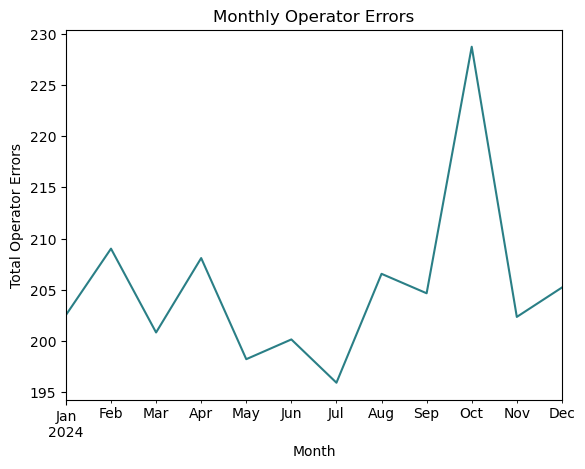

In [118]:
df2.plot(color='#2A7F86')
plt.xlabel("Month") 
plt.ylabel("Total Operator Errors")  
plt.title("Monthly Operator Errors")

Text(0.5, 1.0, 'Monthly non Operator Errors')

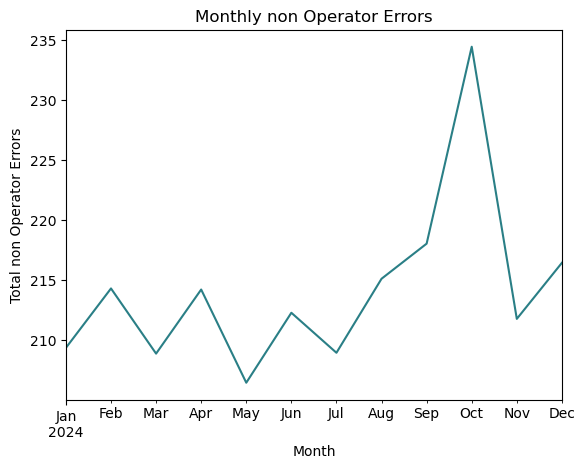

In [115]:
data['Month'] = data['Date'].dt.to_period('M')  
df3 = data.groupby('Month')['non operator error'].sum()
df3.plot(color='#2A7F86')
plt.xlabel("Month") 
plt.ylabel("Total non Operator Errors")  
plt.title("Monthly non Operator Errors")

Text(0.5, 1.0, 'total delay  ')

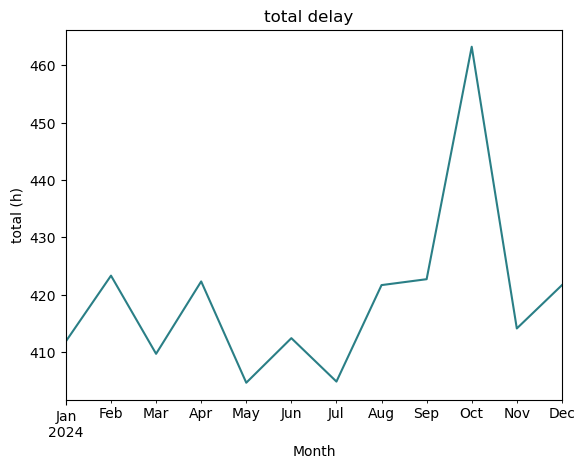

In [114]:
data['Month'] = data['Date'].dt.to_period('M')  # Extract Year-Month
df3 = data.groupby('Month')['total(h)'].sum()
df3.plot(color='#2A7F86')
plt.xlabel("Month") 
plt.ylabel("total (h)")  
plt.title("total delay  ")

Text(0.5, 1.0, 'Batch per month ')

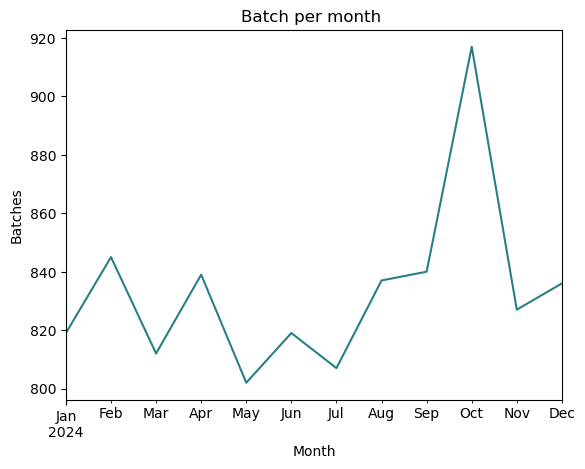

In [113]:
data['Month'] = data['Date'].dt.to_period('M')  
df3 = data.groupby('Month')['Batch'].count()
df3.plot(color='#2A7F86')
plt.xlabel("Month") 
plt.ylabel("Batches")  
plt.title("Batch per month ")

## shift analysis

Text(0.5, 1.0, 'shift delay ')

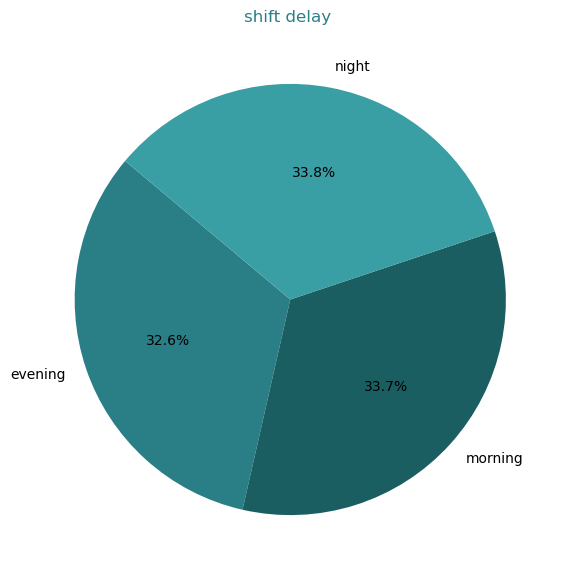

In [122]:
df0 = data.groupby('shift')['total(h)'].sum()
colors = ['#2A7F86', '#1B5E61', '#3A9FA5', '#70C6C6', '#A3E3E3']
plt.figure(figsize=(7, 7))
plt.pie(df0, labels=df0.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Shift Delay', color='#2A7F86')
plt.title('shift delay ')

Text(0.5, 1.0, 'total batches per shift ')

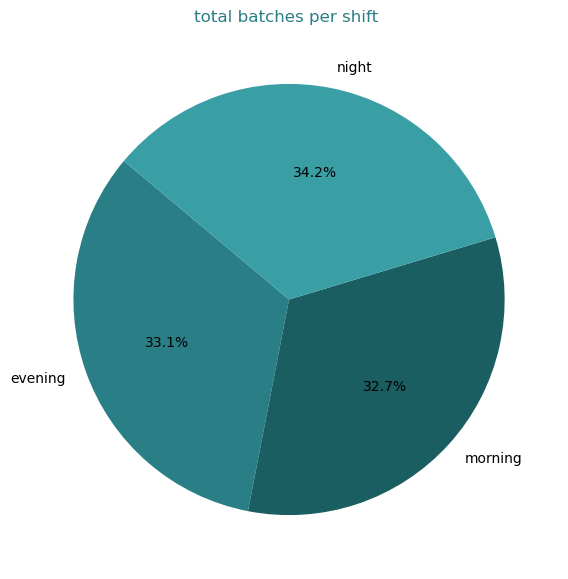

In [121]:
df5 = data.groupby('shift')['Batch'].count()
plt.figure(figsize=(7, 7))
colors = ['#2A7F86', '#1B5E61', '#3A9FA5', '#70C6C6', '#A3E3E3']
plt.pie(df5, labels=df5.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Shift Delay', color='#2A7F86')
plt.title('total batches per shift ')

## operator charts 

In [89]:
data.drop(columns = ['Start Time','End Time','performance','latency'],inplace=True)

In [50]:
data['worked hours'] = data['Duration(h)'] - data['total(h)']


Text(0.5, 1.0, 'Operator Errors vs Worked Hours')

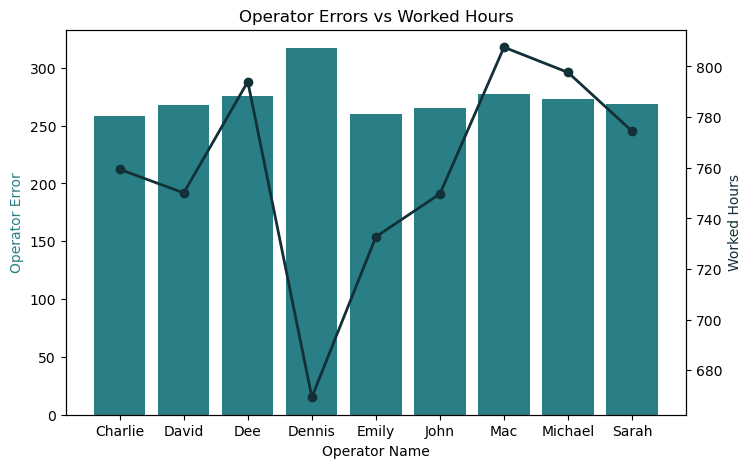

In [67]:


df6 = data.groupby(['operator name']).agg({'operator error':'sum','worked hours':'sum'})

df6

fig, ax1 = plt.subplots(figsize=(8, 5))
ax1.bar(df6.index, df6['operator error'], color='#2A7F86', label='Operator Error')
ax1.set_ylabel("Operator Error", color='#2A7F86')
ax1.set_xlabel("Operator Name")
ax2 = ax1.twinx()
ax2.plot(df6.index, df6['worked hours'], color='#113037', marker='o', linestyle='-', linewidth=2, label='Worked Hours')
ax2.set_ylabel("Worked Hours", color='#113037')
plt.title("Operator Errors vs Worked Hours")


Text(0, 0.5, 'Batch Count')

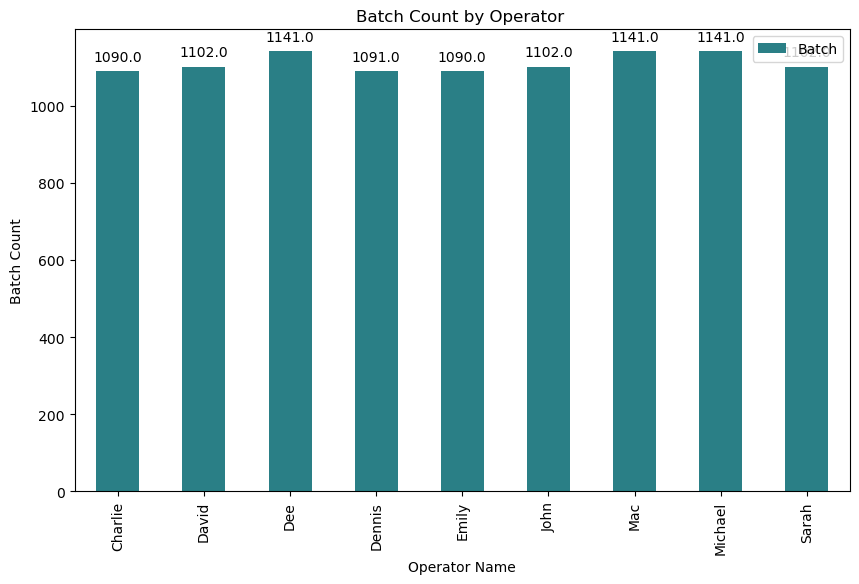

In [72]:
df7 = data.groupby(['operator name']).agg({
    'Batch': 'count', 
}) 
ax = df7.plot(kind='bar', stacked=True,color='#2A7F86', figsize=(10, 6))
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',  
                (p.get_x() + p.get_width() / 2., p.get_height()),  
                xytext=(0, 5),  
                textcoords='offset points',
                ha='center', va='bottom')


plt.title('Batch Count by Operator ')
plt.xlabel('Operator Name')
plt.ylabel('Batch Count')

Text(0, 0.5, 'Total hours')

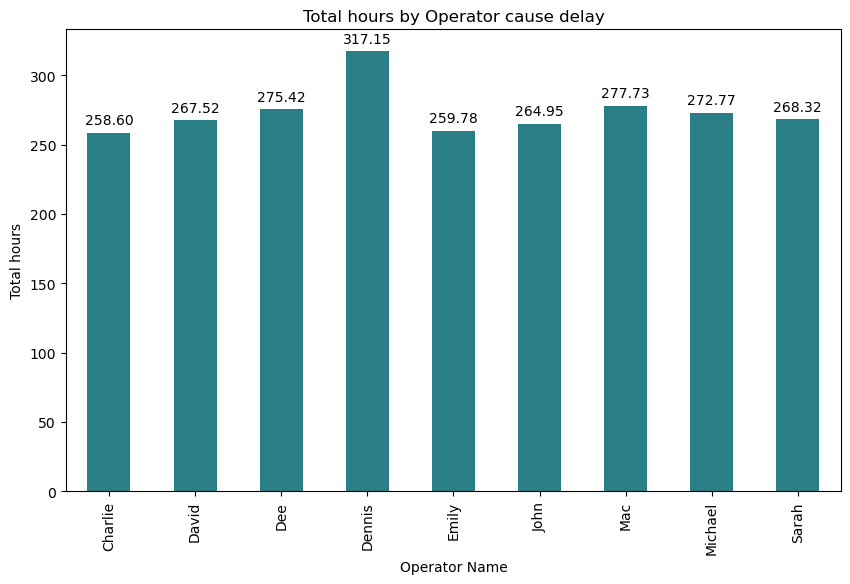

In [9]:
df8 = data.groupby('operator name')['operator error'].sum()
ax = df8.plot(kind = 'bar',color='#2A7F86',figsize=(10, 6))

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',  
                (p.get_x() + p.get_width() / 2., p.get_height()),  
                xytext=(0, 4), 
                textcoords='offset points',
                ha='center', va='bottom')
plt.title('Total hours by Operator cause delay')
plt.xlabel('Operator Name')
plt.ylabel('Total hours')    

In [24]:
df22 = data.groupby('operator name').agg({'Batch change': 'sum', 'Batch coding error': 'sum', 'Label switch':'sum', 'Calibration error':'sum' , 'Machine adjustment':'sum', 'Product spill':'sum'})


(array([   0., 1000., 2000., 3000., 4000., 5000.]),
 [Text(0, 0.0, '0'),
  Text(0, 1000.0, '1000'),
  Text(0, 2000.0, '2000'),
  Text(0, 3000.0, '3000'),
  Text(0, 4000.0, '4000'),
  Text(0, 5000.0, '5000')])

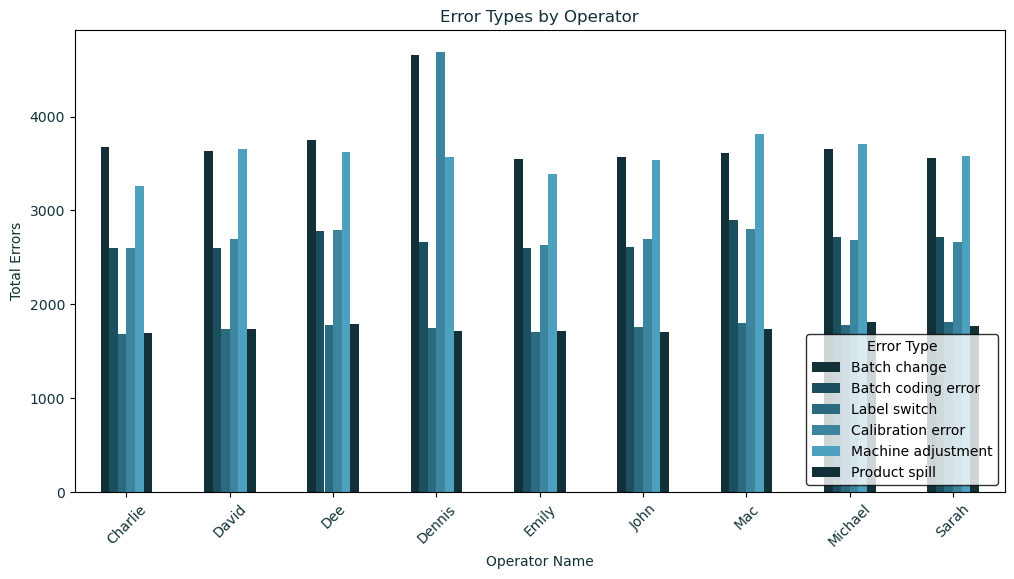

In [76]:
plt.clf()  
plt.close('all') 

custom_colors = ['#113037', '#1B4F5F', '#2C6A7F', '#3D859F', '#4EA0BF']

df22.plot(kind='bar', figsize=(12, 6), color=custom_colors)
plt.title('Error Types by Operator', color='#113037')
plt.xlabel('Operator Name', color='#113037')
plt.ylabel('Total Errors', color='#113037')

plt.legend(title="Error Type", loc='lower right', facecolor='white', edgecolor='black', fontsize=10)

plt.xticks(rotation=45, color='#113037')
plt.yticks(color='#113037')

## product analysis

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Cola'),
  Text(1, 0, 'Cola_2L'),
  Text(2, 0, 'Diet Cola '),
  Text(3, 0, 'Lemon Lime'),
  Text(4, 0, 'Orange'),
  Text(5, 0, 'Root Berry')])

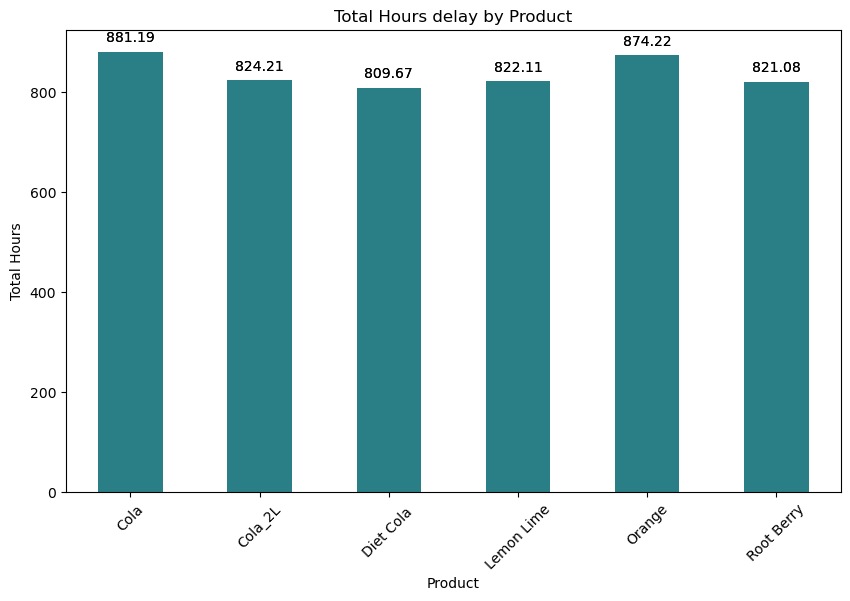

In [70]:
df66 = data.groupby('Product')['total(h)'].sum()
df66.plot(kind='bar')
ax = df66.plot(kind='bar', figsize=(10, 6),color='#2A7F86')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                xytext=(0, 5), 
                textcoords='offset points',
                ha='center', va='bottom')


plt.title('Total Hours delay by Product')
plt.xlabel('Product')
plt.ylabel('Total Hours')


plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Cola'),
  Text(1, 0, 'Cola_2L'),
  Text(2, 0, 'Diet Cola '),
  Text(3, 0, 'Lemon Lime'),
  Text(4, 0, 'Orange'),
  Text(5, 0, 'Root Berry')])

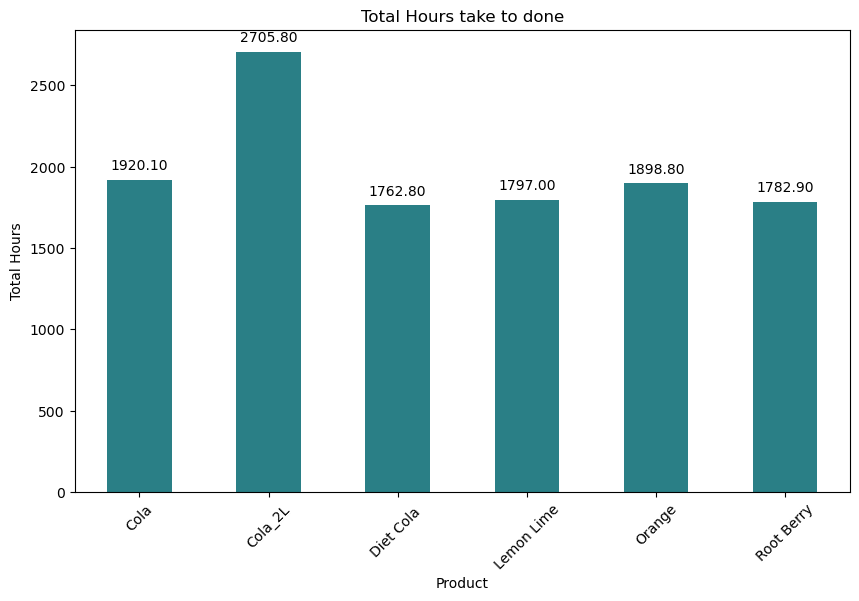

In [69]:

df66 = data.groupby('Product')['Duration(h)'].sum()

ax = df66.plot(kind='bar', figsize=(10, 6),color='#2A7F86')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                xytext=(0, 5), 
                textcoords='offset points',
                ha='center', va='bottom')

plt.title('Total Hours take to done')
plt.xlabel('Product')
plt.ylabel('Total Hours')


plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Cola'),
  Text(1, 0, 'Cola_2L'),
  Text(2, 0, 'Diet Cola '),
  Text(3, 0, 'Lemon Lime'),
  Text(4, 0, 'Orange'),
  Text(5, 0, 'Root Berry')])

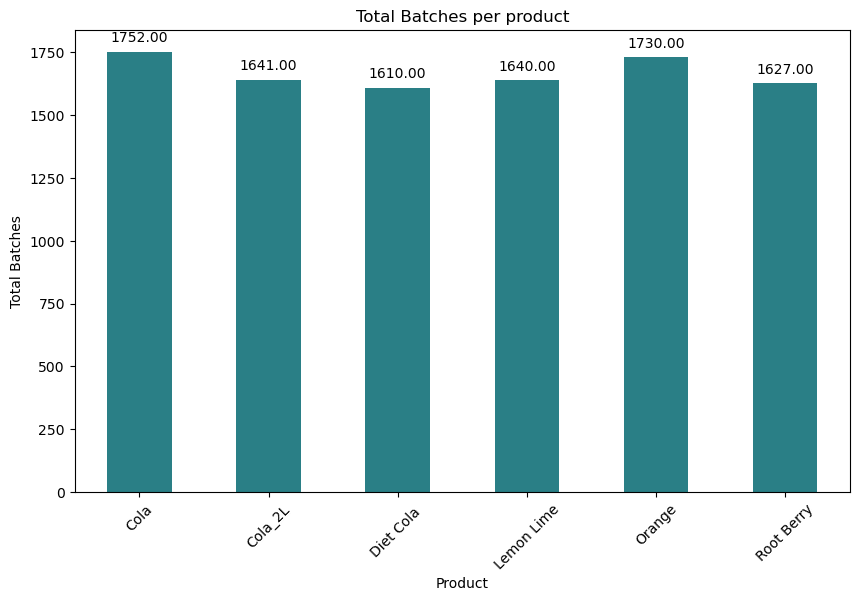

In [68]:
df66 = data.groupby('Product')['Batch'].count()
ax = df66.plot(kind='bar', figsize=(10, 6),color='#2A7F86')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                xytext=(0, 5), 
                textcoords='offset points',
                ha='center', va='bottom')

plt.title('Total Batches per product')
plt.xlabel('Product')
plt.ylabel('Total Batches')


plt.xticks(rotation=45)

In [83]:
error_crosstab = (data.groupby('Product')[[
    'Emergency stop', 'Batch change', 'Labeling error', 'Inventory shortage',
    'Product spill', 'Machine adjustment', 'Machine failure',
    'Batch coding error', 'Conveyor belt jam', 'Calibration error',
    'Label switch', 'Other'
]].sum() / 60).round(2)  # Apply rounding after division
error_crosstab

,Emergency stop,Batch change,Labeling error,Inventory shortage,Product spill,Machine adjustment,Machine failure,Batch coding error,Conveyor belt jam,Calibration error,Label switch,Other
Product,,,,,,,,,,,,
Cola,74.58,98.15,46.30,68.53,46.37,94.97,142.68,70.23,95.52,76.23,46.88,20.85
Cola_2L,69.47,91.18,43.93,64.87,43.92,87.58,133.47,65.38,89.42,71.55,43.22,20.23
Diet Cola,70.25,90.55,41.82,65.90,41.25,87.40,127.97,65.30,87.35,70.33,42.25,19.22
Lemon Lime,69.48,92.58,42.82,64.30,42.12,87.55,135.23,64.82,89.02,71.05,42.65,20.48
Orange,75.27,98.10,45.77,68.08,45.17,90.75,141.67,71.30,94.75,76.72,45.68,20.83
Root Berry,69.87,90.38,43.43,66.27,42.68,87.27,132.75,66.03,88.52,71.75,42.88,19.37


In [90]:
data.head()

,Date,Product,Batch,Duration (m),Duration(h),shift,operator name,Emergency stop,Batch change,Labeling error,...,Conveyor belt jam,Calibration error,Label switch,Other,operator error,total(m),total(h),non operator error,Month,worked hours
0,2024-01-01,Diet Cola,420000,68,1.1,morning,Dennis,2,5,1,...,6,2,2,0,0.28,30,0.50,0.22,2024-01,0.60
1,2024-01-01,Root Berry,420001,67,1.1,night,Mac,1,6,1,...,1,5,1,0,0.27,30,0.50,0.23,2024-01,0.60
2,2024-01-01,Orange,420002,69,1.2,morning,Charlie,3,4,2,...,4,3,2,0,0.22,29,0.49,0.27,2024-01,0.71
3,2024-01-01,Cola,420003,63,1.1,evening,David,4,4,3,...,2,2,2,1,0.27,32,0.54,0.27,2024-01,0.56
4,2024-01-01,Lemon Lime,420004,62,1.0,evening,Sarah,3,1,3,...,4,3,2,1,0.18,31,0.51,0.33,2024-01,0.49


In [86]:
total_hours_per_shift = data.groupby(['Product', 'shift'])['total(h)'].sum()
total_hours_per_shift

Product     shift  
Cola        evening    297.45
            morning    289.55
            night      294.19
Cola_2L     evening    262.25
            morning    270.56
            night      291.40
Diet Cola   evening    264.93
            morning    268.04
            night      276.70
Lemon Lime  evening    265.16
            morning    285.52
            night      271.43
Orange      evening    285.18
            morning    307.03
            night      282.01
Root Berry  evening    263.44
            morning    274.49
            night      283.15
Name: total(h), dtype: float64

Text(0, 0.5, 'operator error(h)')

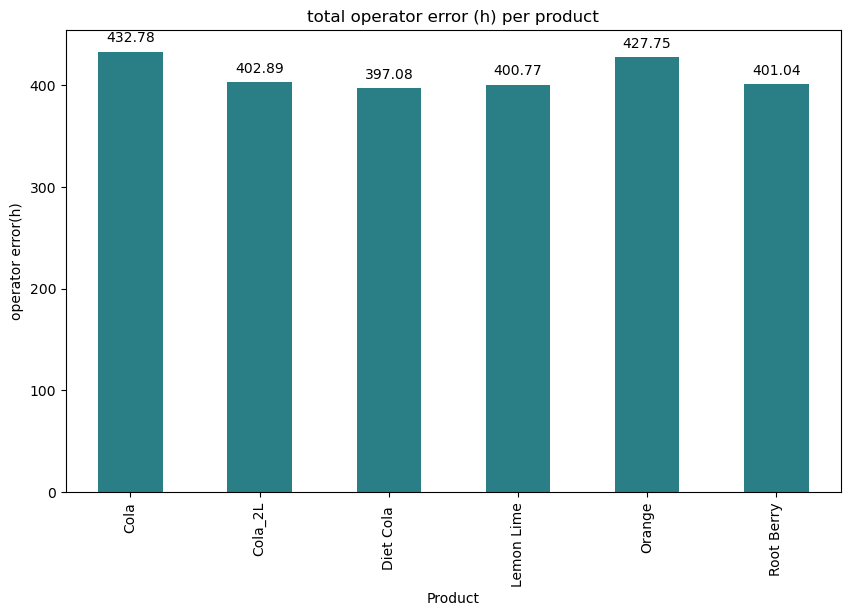

In [93]:
df65 = data.groupby('Product')['operator error'].sum()
ax = df65.plot(kind='bar', figsize=(10, 6),color='#2A7F86')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                xytext=(0, 5), 
                textcoords='offset points',
                ha='center', va='bottom')

plt.title('total operator error (h) per product')
plt.xlabel('Product')
plt.ylabel('operator error(h)')


Text(0, 0.5, 'non operator error(h)')

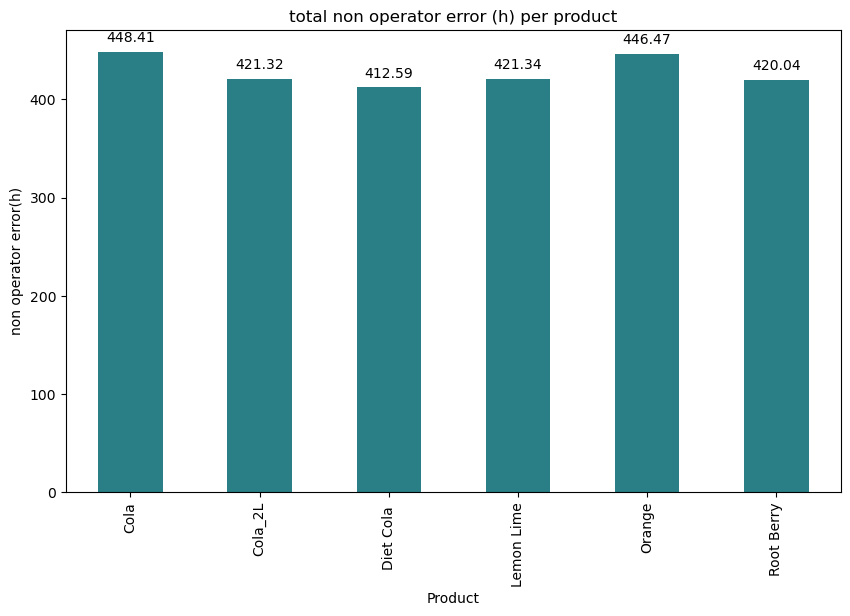

In [94]:
df64 = data.groupby('Product')['non operator error'].sum()
ax = df64.plot(kind='bar', figsize=(10, 6),color='#2A7F86')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                xytext=(0, 5), 
                textcoords='offset points',
                ha='center', va='bottom')

plt.title('total non operator error (h) per product')
plt.xlabel('Product')
plt.ylabel('non operator error(h)')


Text(0, 0.5, 'total worked hours')

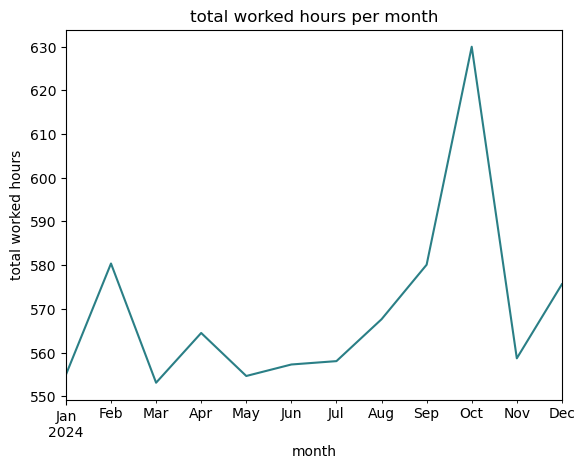

In [105]:
x=data.groupby('Month')['worked hours'].sum()
x.plot(color='#2A7F86')
plt.title('total worked hours per month')
plt.xlabel('month')
plt.ylabel('total worked hours')